#### Prediction of Discretization of GMsFEM Using Deep Learning | Paper Simulations

**kappa.csv** := the simulations of the permeability field (K0 only center is changing)

**stiff.csv** := the coarse stiffness matrix (only changing elements are included)

In [2]:
import numpy as np
np.set_printoptions(linewidth=150, precision=10, floatmode='maxprec')
import pandas as pd
pd.set_option('precision', 10)
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='viridis')
from sklearn.model_selection import train_test_split
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [3]:
X = pd.read_csv('kappa.csv', header=None)
X.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1200,1200,1,1,1,1,2000,1
1,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1200,1200,1,1,1,1,2000,1
2,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1200,1200,1,1,1,2000,1
3,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1200,1200,1,1,1,2000,1
4,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1,1200,1200,1,1,2000,1
5,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1200,1200,1,1,1,1,2000,1
6,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1,1200,1200,1,1,2000,1
7,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1200,1200,1,1,1,2000,1
8,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1200,1200,1,1,1,2000,1
9,1,1,1200,1200,1,1,1,2000,1,1,...,1,1,1,1200,1200,1,1,1,2000,1


In [4]:
Y = pd.read_csv('stiff.csv', header=None)
scaler = StandardScaler()
#X = scaler.fit_transform(X)
print(f"X.T.shape = {X.T.shape},  y.T.shape = {Y.T.shape}")

X.T.shape = (2000, 81),  y.T.shape = (2000, 224)


In [5]:
from sklearn.model_selection import train_test_split
(Xtemp, X_test, ytemp, y_test) = train_test_split(X.T, Y.T, test_size=0.2, random_state=0)
del X, Y

In [6]:
(X_train, X_val, y_train, y_val) = train_test_split(Xtemp, ytemp, test_size=0.25, random_state=1)
del Xtemp, ytemp

In [7]:
y_train = scaler.fit_transform(y_train)
y_val   = scaler.transform(y_val)
y_test  = scaler.transform(y_test)

In [8]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val  : {X_val.shape} , y_val  : {y_val.shape}")
print(f"X_test : {X_test.shape} , y_test : {y_test.shape}")

X_train: (1200, 81), y_train: (1200, 224)
X_val  : (400, 81) , y_val  : (400, 224)
X_test : (400, 81) , y_test : (400, 224)


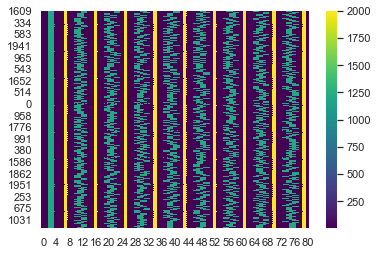

In [9]:
sns.heatmap(X_train, cmap= 'viridis')
plt.show()

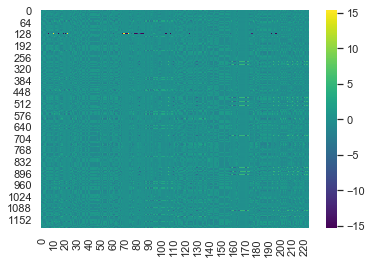

In [10]:
sns.heatmap(y_train, cmap= 'viridis')
plt.show()

In [11]:
lrelu = tf.keras.layers.LeakyReLU(alpha=0.3)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(500 , input_shape=(81,), activation= lrelu),  # 1. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 2. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 3. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 4. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 5. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 6. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 7. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 8. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 9. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 10. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 11. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 12. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 13. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 14. hidden layer
  tf.keras.layers.Dense(500, activation= lrelu),                      # 15. hidden layer
  tf.keras.layers.Dense(224, activation= lrelu)                       # last layer
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               41000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               2

In [13]:
# model.layers #shows model layers as objects
hidden1 = model.layers[1]
print(hidden1.name)
weights, biases = hidden1.get_weights()
print(f"weights: \n {weights[0:10]} \n biases: \n {biases[0:10]}")

dense_1
weights: 
 [[ 0.014779963  -0.07096805    0.0639948    ... -0.048682977  -0.0120659545  0.05063539  ]
 [-0.021573339   0.054557927  -0.035139374  ...  0.007827498  -0.06564355   -0.013745137 ]
 [-0.061756775  -0.06842146    0.031735495  ...  0.063584395  -0.0651381    -0.031631615 ]
 ...
 [ 0.0135450065  0.037466303  -0.026300952  ... -0.05555079   -0.047507018   0.07350104  ]
 [ 0.06813607   -0.04124831    0.02702596   ... -0.04984331    0.06784364   -0.0019678548]
 [-0.07168216   -0.027651466   0.025935754  ...  0.001808703  -0.04275525    0.028661177 ]] 
 biases: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Compiling the DNN Model

In [14]:
from tensorflow.keras import backend as K
def Rsquared(y_true, y_pred):
    SS_residual = K.sum(K.square(y_true-y_pred))
    SS_total    = K.sum(K.square(y_true - K.mean(y_true)) )
    return ( 1 - SS_residual/(SS_total + K.epsilon()) )

opt = tf.keras.optimizers.Adagrad(learning_rate=0.001, name="Adagrad")
model.compile(loss = 'mse',
             optimizer = "Adagrad",
             metrics = Rsquared)
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_val, y_val))

Epoch 1/100
38/38 [==============================] - 1s 20ms/step - loss: 1.7963 - Rsquared: -0.9386 - val_loss: 0.8513 - val_Rsquared: 0.1593
Epoch 2/100
38/38 [==============================] - 1s 13ms/step - loss: 0.7777 - Rsquared: 0.2388 - val_loss: 0.7118 - val_Rsquared: 0.2982
Epoch 3/100
38/38 [==============================] - 1s 13ms/step - loss: 0.6756 - Rsquared: 0.3331 - val_loss: 0.6905 - val_Rsquared: 0.3169
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.6077 - Rsquared: 0.4113 - val_loss: 0.5993 - val_Rsquared: 0.4129
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.5701 - Rsquared: 0.4510 - val_loss: 0.5154 - val_Rsquared: 0.4980
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.5331 - Rsquared: 0.4877 - val_loss: 0.5073 - val_Rsquared: 0.5048
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.4993 - Rsquared: 0.5226 - val_loss: 0.4826 - val_Rsquared: 0.5309
Epoch

38/38 [==============================] - 0s 13ms/step - loss: 0.0789 - Rsquared: 0.9183 - val_loss: 0.1716 - val_Rsquared: 0.8245
Epoch 59/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0780 - Rsquared: 0.9179 - val_loss: 0.1898 - val_Rsquared: 0.8069
Epoch 60/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0779 - Rsquared: 0.9178 - val_loss: 0.1812 - val_Rsquared: 0.8135
Epoch 61/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0729 - Rsquared: 0.9233 - val_loss: 0.1617 - val_Rsquared: 0.8339
Epoch 62/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0730 - Rsquared: 0.9229 - val_loss: 0.1770 - val_Rsquared: 0.8192
Epoch 63/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0727 - Rsquared: 0.9232 - val_loss: 0.1636 - val_Rsquared: 0.8316
Epoch 64/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0692 - Rsquared: 0.9273 - val_loss: 0.1622 - val_Rsquared: 0.8333
Epoch 65/100

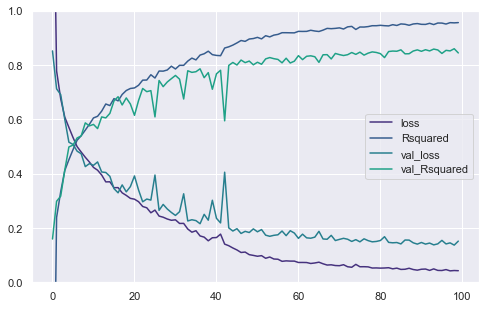

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5)) #pandas plot feature
plt.grid(True)
plt.ylim((0, 1.0))
plt.legend(loc= "best")
plt.show()  

#### Making predictions using test data

In [16]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.2147 - Rsquared: 0.8002


[0.2147037535905838, 0.8001943826675415]

In [17]:
yhat = model.predict(X_test)

In [18]:
pred = pd.DataFrame(yhat, index = None)
pred.head(10)

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.7710689902,-0.2442459017,-1.0164074898,-0.0912835076,1.0600693226,-0.3976889253,-0.0086632231,-2.0415101051,1.0596464872,0.6930337548,...,-0.1019421667,1.1915777922,0.6861163974,1.1853789091,-0.0635806769,-0.1234307811,-0.1655310392,0.6493011117,-0.1147073284,0.6315088868
1,0.7363584042,1.0530654192,-0.7907331586,-0.6684763432,0.8125178814,0.1517183036,0.3015544116,0.2496578693,0.9837080240,1.0291104317,...,-0.1373607069,0.5339457393,-0.5069187284,1.1591891050,0.3701924682,-0.4969263971,-0.2537956834,0.7599552274,-0.1443842053,0.3813313246
2,-0.9586178064,-1.9583275318,0.9421639442,1.7967398167,-1.1623560190,-1.9415024519,-0.2510298789,-1.1594884396,-0.9394488335,-1.6638754606,...,-0.0889769793,-1.1656694412,2.2625217438,-0.5548687577,0.0458135083,1.5511621237,-0.0948416889,-1.4002227783,-0.0916549712,-1.4840643406
3,-0.7750104070,0.1246282235,0.7558671832,-0.3199698031,-0.9208804369,-0.0359842144,-0.0417486466,0.5776121616,-0.8448650241,0.5572386384,...,-0.3470156789,0.9437773228,-0.3472141027,0.8622063994,0.6559995413,-0.4935497940,-0.2364969254,0.4375761449,-0.2836711705,0.5201514363
4,0.3540928960,0.4944702685,-0.8000523448,-0.9587541223,0.7239864469,1.0193439722,-0.0978058726,0.6851935387,0.5195744634,-0.0632119551,...,3.5192544460,0.0557028092,-0.7717686892,-0.6749258637,-3.2127552032,-0.7052020431,3.5487453938,0.6190631986,3.1979842186,0.2776803076
5,0.0993037298,-0.3279141486,-0.3293800056,1.3174917698,-0.1039991155,-0.7292083502,0.1227369308,-0.2948647738,0.1086078286,-0.6257011890,...,-0.1586794704,-0.3940617144,0.7507183552,-0.6129992008,0.9059211016,1.2875868082,-0.2092933208,-0.3879013956,-0.2641132772,-0.3442094624
6,-0.9471254349,-0.8098933101,0.9303355813,0.8064174056,-0.9793282151,-0.8482267261,-0.1790948808,-0.4042179286,-0.9649152160,-0.9194034338,...,-0.2721222043,-0.1271060556,0.7005264163,-0.7269901633,0.1240497604,-0.1268622577,-0.3051050007,-0.2385304123,-0.2124657631,-0.1898527145
7,-1.0229444504,-0.9885205626,1.1986712217,0.9995937943,-0.9139811993,-0.8648316264,-0.0160871316,-0.2947170734,-1.1147911549,-0.9513690472,...,-0.2265887409,-1.1592686176,0.5995226502,-0.6437766552,0.0826115087,1.1665717363,-0.1111257449,-1.1854096651,-0.1334900409,-1.2102705240
8,1.1278049946,-0.0530368127,-0.7391165495,-0.3642003238,0.7604465485,0.2684041858,0.0013920940,0.1238974333,0.9032118917,0.0355845019,...,-0.1236533076,0.1360276341,-0.3253583908,1.1425957680,0.4449355602,-0.3624592125,-0.1424579620,0.2964053452,-0.2203959227,0.3747948110
9,0.8990949988,0.8153384328,-0.7492587566,-1.1475243568,0.7845245600,1.0641508102,0.2906805575,0.6051760912,0.7640413642,0.5599083304,...,-0.3189285994,1.3348736763,-0.9849488735,1.3111313581,0.2127518356,-1.2334935665,-0.2806620598,1.6980429888,-0.2323944122,1.5347436666


In [19]:
y_test

array([[ 0.9742812611,  0.3651950241, -0.9742812611, ...,  0.8169023935, -0.1903695558,  0.8027523857],
       [ 0.9853665531,  1.0042707162, -0.9853665531, ...,  0.3929292624, -0.2193198332,  0.3984952742],
       [-0.9861322363, -1.855917976 ,  0.9861322363, ..., -1.3051740365, -0.1028703423, -1.3919162527],
       ...,
       [-0.9861167545, -1.9331403473,  0.9861167545, ..., -1.3283289376, -0.1028299101, -1.4160624169],
       [-1.0092716205, -0.6979735271,  1.0092716205, ..., -0.1053025676, -0.1633010096, -0.1709563136],
       [-1.0331968327,  0.1353012293,  1.0331968327, ..., -0.1042532077, -0.2257839403, -0.0789461136]])

In [20]:
kappa_test1 = np.asarray(X_test)[1].reshape(9, 9).T # An example permeability simulation
kappa_test2 = np.asarray(X_test)[2].reshape(9, 9).T 
kappa_test3 = np.asarray(X_test)[3].reshape(9, 9).T 
kappa_test4 = np.asarray(X_test)[4].reshape(9, 9).T 

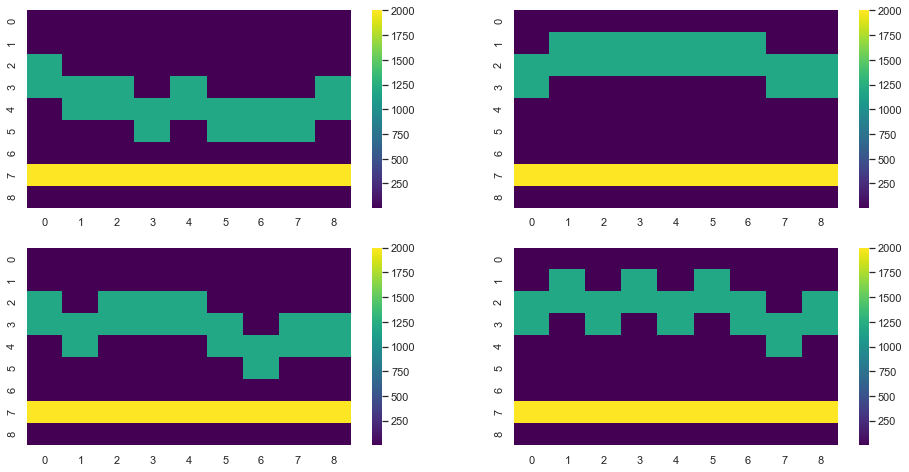

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

sns.heatmap(kappa_test1, cmap = 'viridis', ax = axes[0,0])
sns.heatmap(kappa_test2, cmap = 'viridis', ax = axes[0,1])
sns.heatmap(kappa_test3, cmap = 'viridis', ax = axes[1,0])
sns.heatmap(kappa_test4, cmap = 'viridis', ax = axes[1,1])

#### Comparing y_hat with y_test in different norms $l^2, l^\infty$ and *Frobenius* norms:

$$e_{l^2}(K_{N+j}) = \dfrac{||A_c^{K_l}(K_{N+j}) - A_c^{K_l, pred}(K_{N+j})||_2}{||A_c^{K_l}(K_{N+j})||_2}$$

$$e_{l^\infty}(K_{N+j}) = \dfrac{||A_c^{K_l}(K_{N+j}) - A_c^{K_l, pred}(K_{N+j})||_\infty}{||A_c^{K_l}(K_{N+j})||_\infty}$$

$$e_F(K_{N+j}) = \dfrac{||A_c^{K_l}(K_{N+j}) - A_c^{K_l, pred}(K_{N+j})||_F}{||A_c^{K_l}(K_{N+j})||_F}$$

In [22]:
print(f"yhat.shape = {yhat.shape},  y_test.shape = {y_test.shape}")
print(f" yhat = \n {yhat}")
print(f" yhat = \n {y_test}")

yhat.shape = (400, 224),  y_test.shape = (400, 224)
 yhat = 
 [[ 7.71068990e-01 -2.44245902e-01 -1.01640749e+00 ...  6.49301112e-01 -1.14707328e-01  6.31508887e-01]
 [ 7.36358404e-01  1.05306542e+00 -7.90733159e-01 ...  7.59955227e-01 -1.44384205e-01  3.81331325e-01]
 [-9.58617806e-01 -1.95832753e+00  9.42163944e-01 ... -1.40022278e+00 -9.16549712e-02 -1.48406434e+00]
 ...
 [-7.62378037e-01 -1.84861839e+00  9.24657583e-01 ... -1.40822256e+00 -1.74433559e-01 -1.37411785e+00]
 [-6.49048567e-01 -1.18165895e-01  5.96296191e-01 ... -3.12049920e-03  9.43315327e-02  8.95663165e-04]
 [-1.02785254e+00 -1.14859425e-01  9.70781267e-01 ... -1.54593796e-01 -2.65571326e-01 -4.02768314e-01]]
 yhat = 
 [[ 0.9742812611  0.3651950241 -0.9742812611 ...  0.8169023935 -0.1903695558  0.8027523857]
 [ 0.9853665531  1.0042707162 -0.9853665531 ...  0.3929292624 -0.2193198332  0.3984952742]
 [-0.9861322363 -1.855917976   0.9861322363 ... -1.3051740365 -0.1028703423 -1.3919162527]
 ...
 [-0.9861167545 -1.9331403

In [23]:
y = np.array(scaler.inverse_transform(y_test))[0:10]
yhat = np.array(scaler.inverse_transform(yhat))[0:10]
error = np.zeros((10, 2))
for i in np.arange(10):
    error[i, 0] = round(100*LA.norm((y-yhat)[i])/LA.norm(y[i]), 2)
    error[i, 1] = round(100*LA.norm((y-yhat)[i], ord=np.inf)/LA.norm(y[i], ord=np.inf), 2)

In [24]:
df = pd.DataFrame(error, columns = ["$e_l^2$", "$e_l^{\infty}$"], index=pd.Series(range(1,11), name='Sample'))
df

,$e_l^2$,$e_l^{\infty}$
Sample,,
1,8.85,12.95
2,10.07,12.49
3,4.65,6.74
4,21.34,24.52
5,34.89,60.75
6,44.66,64.19
7,9.17,13.72
8,5.83,8.86
9,8.57,14.29
